# Segmenting and Clustering Neighborhoods in Varanasi for mordernisation

## Introduction

### In this project, we are going to explore Varanasi city, the cultural hub of India. In particular, we are going to explore various venues catogories from foursquare, specifically ATMs in the area. We would look at the ATM distribution and come up with the possibile places as a suggestion to install/set up new ATM machine. Varanasi is a place represented by our Hon PM of India and it has also been selected to develop Varanasi as a Smart Heritage City. Read below few interesting things about Varanasi. Inspired by Hon Prime Minister Narendra Modi's vision, the VAKYO initiative aims to connect the heritage cultural cities of Varanasi and Kyoto through the India Japan Global Partnership. (http://www.vakyo.org/)

Varanasi also known as Benares or Kashi is a city on the banks of the river Ganges in Uttar Pradesh, India. A major religious hub in India, it is the holiest of the seven sacred cities (Sapta Puri) in Hinduism and Jainism.  
Varanasi grew as an important industrial centre famous for its muslin and silk fabrics, perfumes, ivory works, and sculpture. Buddha is believed to have founded Buddhism here around 528 BCE when he gave his first sermon, "The Setting in Motion of the Wheel of Dharma", at nearby Sarnath. The city's religious importance continued to grow in the 8th century, when Adi Shankara established the worship of Shiva as an official sect of Varanasi. During the Muslim rule through the Middle Ages, the city continued as an important centre of Hindu devotion, pilgrimage, mysticism and poetry which further contributed to its reputation as a centre of cultural importance and religious education. Tulsidas wrote his epic poem on Rama's life called Ram Charit Manas in Varanasi. Several other major figures of the Bhakti movement were born in Varanasi, including Kabir and Ravidas. 
In the 16th century, Varanasi experienced a cultural revival under the Mughal emperor Akbar who patronised the city, and built two large temples dedicated to Shiva and Vishnu, though much of modern Varanasi was built during the 18th century, by the Maratha and Bhumihar Brahmin kings. The Kingdom of Benares was given official status by the Mughals in 1737, and continued as a dynasty-governed area until Indian independence in 1947. The city is governed by the Varanasi Nagar Nigam (Municipal Corporation) and is represented in the Parliament of India by the current Prime Minister of India Narendra Modi, who won the Lok Sabha elections in 2014 by a huge margin. Silk weaving, carpets and crafts and tourism employ a significant number of the local population, as do the Diesel Locomotive Works and Bharat Heavy Electricals.
Varanasi has been a cultural centre of northern India for several thousand years. The city is known worldwide for its many ghats, embankments made in steps of stone slabs along the river bank where pilgrims perform ritual ablutions. Of particular note are the Dashashwamedh Ghat, the Panchganga Ghat, the Manikarnika Ghat and the Harishchandra Ghat, the last two being where Hindus cremate their dead and the Hindu genealogy registers at Varanasi are kept here. 
Among the estimated 23,000 temples in Varanasi are Kashi Vishwanath Temple of Shiva, the Sankat Mochan Hanuman Temple, and the Durga Temple. An educational and musical centre, many prominent Indian philosophers, poets, writers, and musicians live or have lived in the city, and it was the place where the Benares gharana form of Hindustani classical music was developed. One of Asia's largest residential universities is Banaras Hindu University (BHU). 

### Lets start with importing the neccesary libraries

In [104]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter #to pause between each call


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import webbrowser
from PIL import Image 

print('Libraries imported.')

Libraries imported.


### Lets read the .csv file downloaded from https://data.gov.in 

In [2]:
#Lets download data set directly from govt of India website and save it in the local drive. This contains all the pincode of India. We shall extract Varanasi data from here.
df= pd.read_csv('all_india_PO_list_without_APS_offices_ver2.csv') 


### Lets go through the columns and select the columns that interests us.

In [3]:
df.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


### Select only Varanasi District from the all India Pincode data

In [77]:
#Extract the data for the city Varanasi
df_vrnsall= df[df['Districtname']=='Varanasi']
df_vrnsall.shape

(303, 15)

### Varanasi city has total 303 area within its total pincode. We aren't getting Latitude/Longitude by areas, hence we will get distinct pincode and keep only relevant columns for further processing.

In [33]:
#Since there are several offices under one pincode, pincode is repeated. we need to drop the duplicates and get single entry for each pincode. 
df_vrns = df_vrnsall.drop_duplicates(subset = ['pincode'])
#Select only relevant columns
df_vrns = df_vrns[['pincode','divisionname','Taluk']]
df_vrns.head()

,pincode,divisionname,Taluk
130477,232110,Varanasi East,Varanasi
130478,221101,Varanasi East,Varanasi
130479,232102,Varanasi East,Varanasi
130480,221007,Varanasi East,Varanasi
130487,221104,Varanasi East,Varanasi


In [6]:
df_vrns.shape

(50, 3)

### We get 50 as distinct pincod for Varanasi. Lets now use geocoder to retrieve Latitude/Longitude.

In [7]:
#Since the latitude and longitude of the places are empty, we need to use geocode to get its Geo Coordinates

locator = Nominatim(user_agent= 'myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_vrns['location'] = df_vrns['pincode'].apply(geocode)

# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_vrns['point'] = df_vrns['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns

df_vrns[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_vrns['point'].tolist(), index=df_vrns.index)

### Lets check the shape of our location data. We remove the extra columns which are not required.

In [8]:
#drop the columns 'point' and 'altitude as they serve no purpose'

df_vrnsselect = df_vrns.drop(columns=['point','altitude'])
print("before drop ",df_vrnsselect.shape )
#drop the rows with nan
df_vrnsselect = df_vrnsselect.dropna(axis=0)
print("after drop ",df_vrnsselect.shape )

before drop  (50, 6)
after drop  (37, 6)


### There are total 37 pincode within Varanasi and we would use these pincode with its Latitude/Longitude to find near by areas. We would use Pincode as a Neighborhood.

### It appears that some of the pincode is returning location from as far as chine. we need to remove such rows. We first find the country information from location column and select only country 'India'. 

In [9]:
#check if there are any wrong entry in the location. for ex. for some of the pincode, location returned is that of china
df_vrnsselect['key'] = pd.DataFrame(df_vrnsselect['location'].apply(lambda loc: loc[0][-5:]))

#remove where 'key' is not India
df_vrnsselect = df_vrnsselect[df_vrnsselect['key']=='India']


In [10]:
df_city = df_vrnsselect.drop(columns=['key'], axis=1)
df_city.head()
#We see that there are three 

,pincode,divisionname,Taluk,location,latitude,longitude
130477,232110,Varanasi East,Varanasi,"(Chandauli, Uttar Pradesh, 232110, India, (25....",25.321326,83.528697
130478,221101,Varanasi East,Varanasi,"(Varanasi, Vārānasi, Varanasi, Uttar Pradesh, ...",25.473806,83.001283
130480,221007,Varanasi East,Varanasi,"(Sadar, Varanasi, Uttar Pradesh, 221007, India...",25.359771,83.016917
130487,221104,Varanasi East,Varanasi,"(Sadar, Varanasi, Uttar Pradesh, 221104, India...",25.298198,82.947768
130489,232111,Varanasi East,Varanasi,"(Chakia, Chandauli, Uttar Pradesh, 232111, Ind...",24.850499,83.206593


In [11]:
#convert the dataframe and save it in csv
#df_vrns.to_csv("Varanasi_latlong.csv")


### We have created a Foursquare developer account and have our credentials. Lets put these to use.

### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'FBIHVK2HFS0GYU1NYOJ1U4Y1EMVBUMDSR1HWDWWTPQMEHF0O' # your Foursquare ID
CLIENT_SECRET = 'OPIYLH2AV2JASDBWZFPVDHW5PPOHG53XAHECNNM1YJIXZOU2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FBIHVK2HFS0GYU1NYOJ1U4Y1EMVBUMDSR1HWDWWTPQMEHF0O
CLIENT_SECRET:OPIYLH2AV2JASDBWZFPVDHW5PPOHG53XAHECNNM1YJIXZOU2


### Now, let's get the top 200 venues by pincode in 4000 meters, since pincode areas are bigger in size and our venue are smaller in numbers

In [88]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=4000     # define radius
    LIMIT=200  # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [89]:
city_venues = getNearbyVenues(names=df_city['pincode'],
                                   latitudes=df_city['latitude'],
                                   longitudes=df_city['longitude']
                                  )

232110
221101
221007
221104
232111
232118
221011
232109
221001
232103
232104
232101
221008
232108
232105
221002
221010
221202
221311
221402
221106
221307
221108
221105
221003
221302
221401
221306
221107
221304


In [90]:
city_venues.shape

(171, 7)

#### Use geopy library to get the latitude and longitude values of Varanasi

In [16]:
address = 'Varanasi, India'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Varanasi are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Varanasi are 25.3356491, 83.0076292.


### Create a map of Varanasi with superimposed  Venues

In [92]:
# create map of New York using latitude and longitude values
map_varanasi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Venuecat, Venue in zip(city_venues['Venue Latitude'], city_venues['Venue Longitude'], city_venues['Venue Category'],city_venues['Venue']):
    label = '{},{}'.format(Venuecat, Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_varanasi)  
    
map_varanasi.save("map_varanasi.html")

In [93]:
webbrowser.open('map_varanasi.html')

True

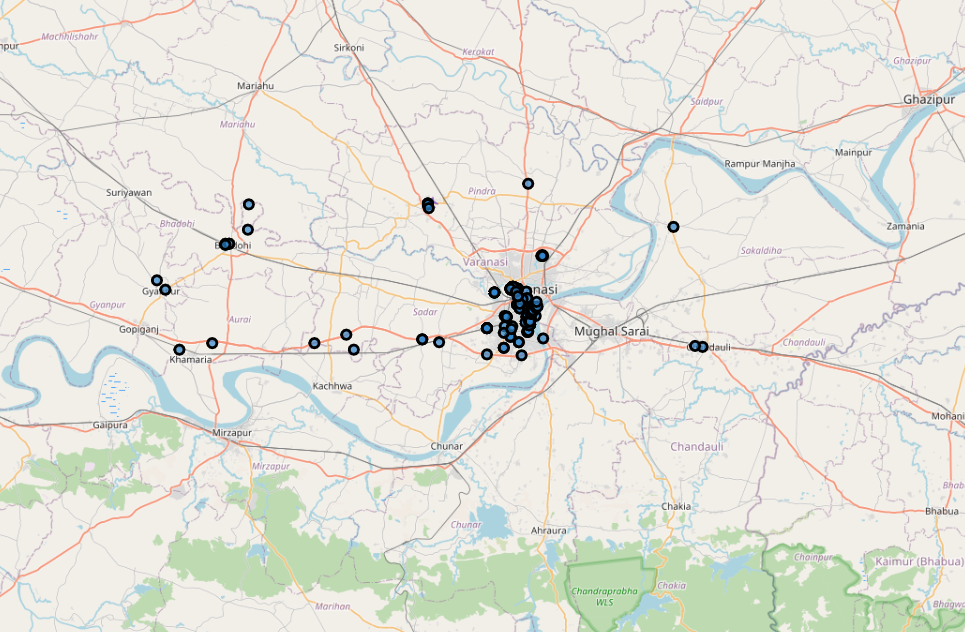

In [94]:
img1= Image.open("varanasi_all.png")
img1

### Now, lets explore the places in Varanasi that we have extracted from Foursquare

In [19]:
city_venues.shape

(171, 7)

### Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

There are 46 uniques categories.


In [21]:
#Lets check how many venues are by categories
city_count = city_venues.groupby(['Venue Category']).count().reset_index()
city_count['Count'] = city_count['Neighborhood']
city_count = city_count[['Venue Category','Count']]
city_count.sort_values(by='Count',ascending=False)
print('In top 5, the uniques categories are :  {} '. format(city_count.nlargest(5, 'Count')))

In top 5, the uniques categories are :         Venue Category  Count
23              Hotel     48
0                 ATM     15
9                Café      9
26  Indian Restaurant      9
32        Pizza Place      9 


#### Lets see which pincode has the highest number of venues.

In [22]:
pd.pivot_table(city_venues, index=['Neighborhood', 'Venue Category'],values='Venue', aggfunc=np.sum).reset_index().groupby('Neighborhood').count().sort_values(by='Venue',ascending=False)

,Venue Category,Venue
Neighborhood,,
221010,20,20
221008,8,8
221011,8,8
221002,8,8
221001,7,7
221302,7,7
221003,4,4
221007,4,4
221104,4,4


### Lets see how many neighbor/pincode has "ATM" in the vicinity

In [23]:
city_venues[city_venues['Venue Category']=='ATM'].groupby(['Neighborhood','Venue Category']).count().reset_index()

,Neighborhood,Venue Category,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,221101,ATM,1,1,1,1,1
1,221104,ATM,1,1,1,1,1
2,221106,ATM,2,2,2,2,2
3,221107,ATM,1,1,1,1,1
4,221108,ATM,2,2,2,2,2
5,221302,ATM,1,1,1,1,1
6,221304,ATM,2,2,2,2,2
7,221307,ATM,1,1,1,1,1
8,221311,ATM,1,1,1,1,1
9,221402,ATM,1,1,1,1,1


### Lets get the ATM Venue' Latitude/Longitude

In [96]:
city_venuesATM = city_venues[city_venues['Venue Category']=='ATM']
city_venuesATM.head(15)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,221101,25.473806,83.001283,Axis Bank ATM,25.475031,83.003067,ATM
6,221104,25.298198,82.947768,Axis Bank ATM,25.283960,82.942726,ATM
38,232104,25.259712,83.269224,HDFC Bank,25.259291,83.258513,ATM
39,232104,25.259712,83.269224,Axis Bank ATM,25.260300,83.246902,ATM
124,221311,25.268025,82.847251,HDFC Bank,25.269376,82.847920,ATM
127,221402,25.418702,82.537234,Axis Bank ATM,25.396360,82.559720,ATM
131,221106,25.277341,82.960502,Axis Bank ATM,25.283960,82.942726,ATM
132,221106,25.277341,82.960502,Axis Bank ATM,25.258280,82.967340,ATM
137,221307,25.270213,82.718024,Axis Bank ATM,25.255934,82.747169,ATM
138,221108,25.283238,82.947716,Axis Bank ATM,25.283960,82.942726,ATM


### Now lets again visualise the Varanasi map and display the neighborhood. On top of which display 'ATM' venue

In [25]:
address = 'Varanasi, India'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Varanasi are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Varanasi are 25.3356491, 83.0076292.


### Lets superimpose the pincode/ neighborhood

In [97]:
# create map of New York using latitude and longitude values
map_varanasiatm = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(city_venues['Neighborhood Latitude'], city_venues['Neighborhood Longitude'], city_venues['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_varanasiatm)  
    
map_varanasiatm.save("map_varanasi2.html")
webbrowser.open('map_varanasi2.html')

True

### Lets first visualize the Varanasi pincode locations

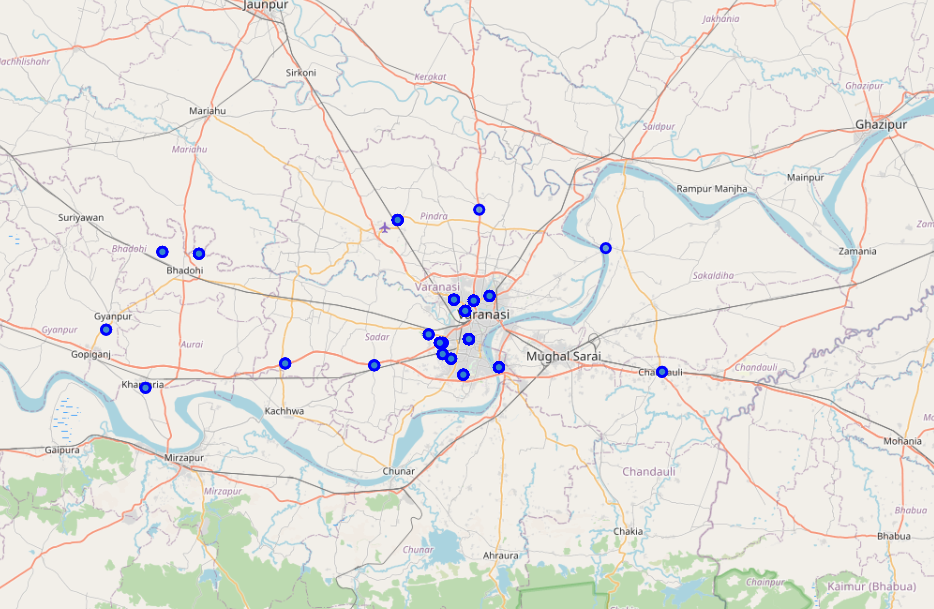

In [98]:
Image.open("Varanasi_pincode.png")

### Add markers to map for the ATMs venue

In [99]:

# add markers to map for the ATMs venue
for lat, lng, Venue in zip(city_venuesATM['Venue Latitude'], city_venuesATM['Venue Longitude'], city_venuesATM['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_varanasiatm)  
    
map_varanasiatm.save("map_varanasiatm.html")
webbrowser.open('map_varanasiatm.html')

True

### Next we visualize the Varanasi pincode (blue circle) and ATM location (circled with red) both

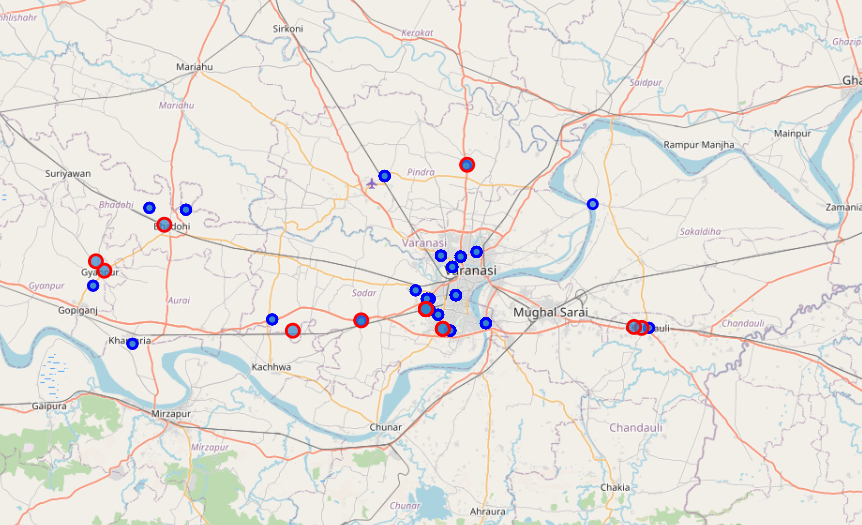

In [100]:
Image.open("varanasi_pincode_atm.png")

### In the end, we see all the three Varanasi pincode (blue circle), Venues within pincodes (black circled) and ATM location (circled with red)

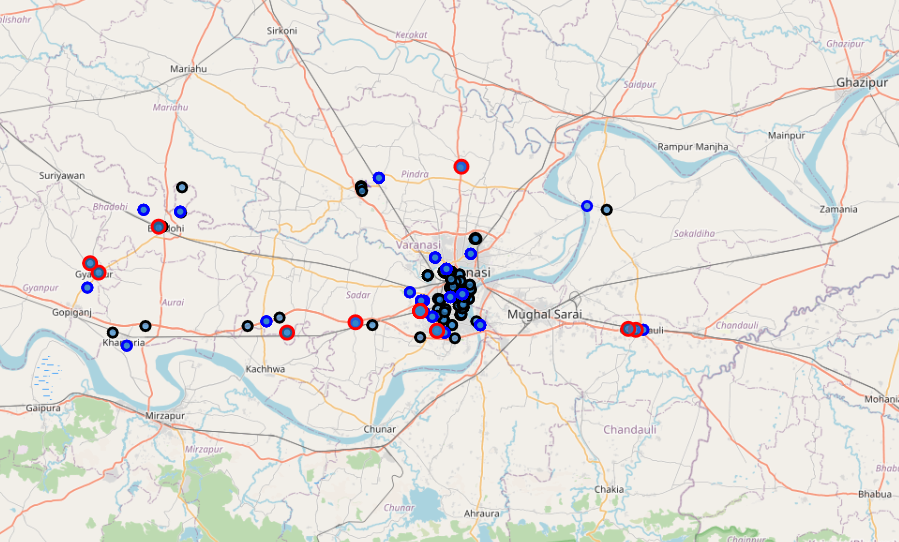

In [28]:
img= Image.open("varanasi.png")

### Find the pincode/neighborhood where there are no ATM machines

In [91]:
print("Total valid neighborhood/pincode in Varanasi with geocoordinates:", df_city['pincode'].unique().shape)
print("Total neighborhood/pincode in Varanasi with venues returned from Forsquare API is:", city_venues['Neighborhood'].unique().shape)
print("Total venues in Varanasi out of 22 neighborhood/pincode: ", city_venues.shape)
print("Total venues with ATM in Varanasi:", city_venuesATM.shape)
print("Total unique neighborhood/pincode with ATM in Varanasi:", city_venuesATM['Neighborhood'].unique().shape)
print("How many neighborhood/pincode have no ATM", pd.merge(city_venuesATM, city_venues, how='left', on='Neighborhood').shape)
#print(pd.merge(city_venuesATM, city_venues, how='left', on='Neighborhood')['Neighborhood'].unique().shape)

Total valid neighborhood/pincode in Varanasi with geocoordinates: (30,)
Total neighborhood/pincode in Varanasi with venues returned from Forsquare API is: (22,)
Total venues in Varanasi out of 22 neighborhood/pincode:  (171, 7)
Total venues with ATM in Varanasi: (15, 7)
Total unique neighborhood/pincode with ATM in Varanasi: (11,)
How many neighborhood/pincode have no ATM (51, 13)



### Find the areas within pincodes that have no ATMs.

In [115]:
df_noatm =pd.merge(city_venuesATM, city_venues, how='left', on='Neighborhood')['Neighborhood'].unique()
print(df_noatm)

[221101 221104 232104 221311 221402 221106 221307 221108 221302 221107
 221304]


In [135]:
df_vrnsallselect= df_vrnsall[['officename', 'pincode']]
df_vrnsallselect
df_vrnsallselect['ispresent'] = df_vrnsallselect.pincode.isin(df_noatm).astype(int)
df_vrnsallselect= df_vrnsallselect[df_vrnsallselect['ispresent']== 1]
df_vrnsallselect.head()

C:\Users\ReetuSingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,officename,pincode,ispresent
130478,Ajgara B.O,221101,1
130486,Amarpatti B.O,221101,1
130487,Amauli B.O,221104,1
130488,Ambba B.O,221104,1
130500,Babiaon B.O,221101,1


In [136]:
df_vrnsallselect[df_vrnsallselect['ispresent']== 1].shape # 11 pincodes have 75 area that are valid places to set up an ATM Machines.

(75, 3)

###  Conclusion: As we can see, even after increasing the radius and limit of search, we could find only 197 venues from 45 distinct Venue categories. Our top 5 highest categories are from 'Hotel':46, 'ATM': 15, 'Indian Restaurant':  14, 'Café':12, 'Pizza Place':11. The venues are sparse and distriuted more around Ganga river. There are 75 areas which should be considered to set up ATMs. 

# END